<h2><b>Car Price Prediction Using Machine Learning<b></h2>

This project aims to develop a predictive model for estimating the prices of used cars based on various features. Utilizing a dataset from CarDekho, the project employs advanced machine learning techniques to analyze and predict car prices with high accuracy.

Key features of the dataset include car make, model, year of manufacture, fuel type, transmission type, mileage, engine size, and several other attributes. By applying data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features, we prepare the data for model training.

The project explores multiple regression algorithms, including Linear Regression, Ridge Regression, Lasso Regression, and more complex models like Random Forest Regressor. Through hyperparameter tuning and cross-validation, we identify the best-performing model.

The final model provides insights and predictions on car prices, assisting buyers and sellers in making informed decisions. Additionally, we visualize the relationship between different features and car prices, enhancing the interpretability of the model.

<h3>Importing Libarires</h3>

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import pickle

Loading the dataset

In [2]:
car_data = pd.read_csv('car_data.csv')

In [3]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking for missing values

In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking Distribution of Categorical Data


In [6]:
print(car_data.Fuel_Type.value_counts())
print()
print(car_data.Seller_Type.value_counts())
print()
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [7]:
# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


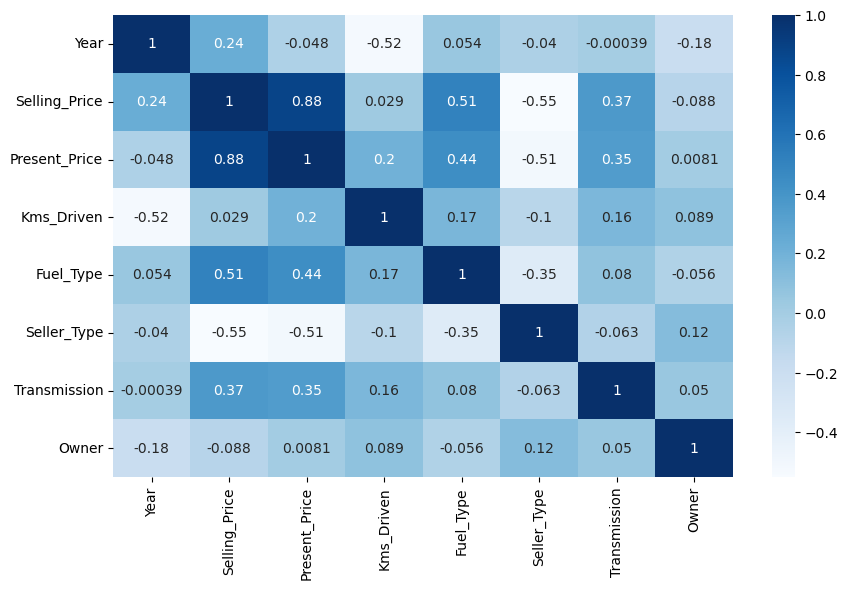

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(car_data.corr(), annot=True, cmap='Blues')
plt.show()

In [10]:
# Dropping 'Car_Name' as it is not relevant for the prediction
car_data.drop(['Car_Name'], axis=1, inplace=True)

In [11]:
# Feature Engineering: Creating a new column 'Car_Age'
car_data['Car_Age'] = 2024 - car_data['Year']
car_data.drop(['Year'], axis=1, inplace=True)

In [41]:
# Splitting the data into training and testing sets
X = car_data.drop(['Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [43]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,8
297,5.90,60000,0,0,0,0,9
298,11.00,87934,0,0,0,0,15
299,12.50,9000,1,0,0,0,7


In [44]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3><b>Performing Hyperparameter Tuning<b></h3>

In [35]:
# Defining model parameters for GridSearchCV
model_params = {
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 10, 100]
        }
    }
}

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, scoring='neg_mean_squared_error')
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': -clf.best_score_,  
        'best_params': clf.best_params_
    })

# Converting scores to a DataFrame for better visualization
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

               model  best_score                            best_params
0              ridge    3.572207                          {'alpha': 10}
1      random_forest    2.958710  {'max_depth': 30, 'n_estimators': 50}
2  linear_regression    4.003412                                     {}
3              lasso    3.858458                         {'alpha': 0.1}


<b>Building Model<b>

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_model = RandomForestRegressor(max_depth=None, n_estimators=50)
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [36]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.8611603862295089
R-squared Score: 0.9626160827188484


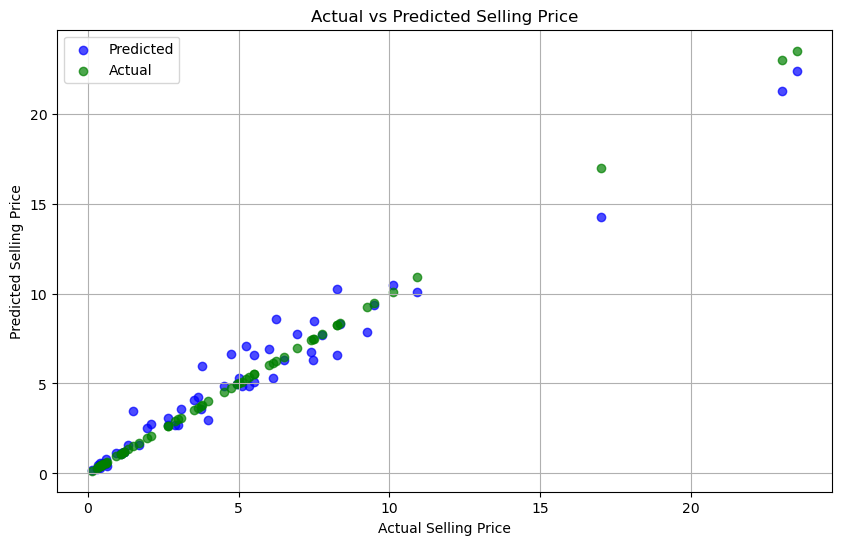

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.7, color='g', label='Actual')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Saving the best model using pickle
with open('best_car_price_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_car_price_model.pkl'.")

# Example of loading the saved model and making a prediction
with open('best_car_price_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Model saved as 'best_car_price_model.pkl'.


In [46]:
# Makeing a prediction with the loaded model
example_data = [[5.0, 40000, 0, 0, 0, 0, 8]]  # Example input data
predicted_price = loaded_model.predict(example_data)
print(f"Predicted Selling Price for the example data: {predicted_price[0]}")

Predicted Selling Price for the example data: 26.339800000000004
